In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler

import umap.umap_ as umap


c:\Users\asaraiva\OneDrive - Capgemini\Documents\ROUTE25\ROUTE25\11_1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_folder2 = "qws2"
data_folder1 = "qws1"
file_path2 = os.path.join(data_folder2, "qws2.txt")
file_path1 = os.path.join(data_folder1, "qws1.txt")
cleaned_file_path2 = os.path.join(data_folder2, "data.csv")
cleaned_file_path1 = os.path.join(data_folder1, "data1.csv")

In [3]:
# Read the file, skipping lines that start with #
with open(file_path2, "r") as f:
    lines = [line.strip() for line in f if not line.startswith("#") and line.strip() != ""]

ori_df = pd.DataFrame(lines)

ori_df = ori_df[0].str.split(",", expand=True)

ori_df = ori_df.drop(columns=11)

ori_df.columns = ["Response Time", "Availability", "Throughput", "Successability", "Reliability", "Compliance", "Best Practices", "Latency", "Documentation", "Service Name", "WSDL Address"]

ori_df.head(100)
ori_df.to_csv(cleaned_file_path2)


with open(file_path1, "r") as f:
    lines = [line.strip() for line in f if not line.startswith("#") and line.strip() != ""]

ori_df = pd.DataFrame(lines)

ori_df = ori_df[0].str.split(",", expand=True)

ori_df.columns = ["Response Time", "Availability", "Throughput", "Successability", "Reliability", "Compliance", "Best Practices", "Latency", "Documentation", "WsRF", "Class", "Service Name", "WSDL Address"]

ori_df.head(100)
ori_df.to_csv(cleaned_file_path1)


 Format: QWS parameters are separated by commas (first nine)		##
 Format: (1) Response Time						##
 Format: (2) Availability						##
 Format: (3) Throughput						##
 Format: (4) Successability						##
 Format: (5) Reliability						##
 Format: (6) Compliance						##
 Format: (7) Best Practices						##
 Format: (8) Latency							##
 Format: (9) Documentation						##
 Format: (10) Service Name						##
 Format: (11) WSDL Address						##Documentation

In [4]:
# Load data
df1 = pd.read_csv(cleaned_file_path1, index_col=0)  

df = df1
print(len(df))
df.head()

364


,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


# Dtypes and Nulls

there are no empty values

In [5]:
for col in df.columns:
    print(col)
    print(df[col].dtypes)
    print("Null:", df[col].isna().mean() * 100)
    print(df[col].unique())
    print('- - -')

Response Time
float64
Null: 0.0
[   45.       71.75    117.       70.      105.2     224.       99.2
   108.2     125.2     110.3     105.4     129.      124.92    114.
   125.44    136.07    132.      122.      129.67     96.      109.09
    77.86    165.       50.       75.      159.      126.2     125.75
   111.      175.      130.      327.5     145.62    126.77    132.12
   135.      180.      166.11    150.45    138.13    238.      169.33
   134.      136.5      77.5     158.17    119.      122.12   1442.
   225.36    197.      113.5     164.      479.      167.67    134.34
   136.88    167.6     133.5     125.5     171.6      65.28    117.27
   164.5     113.8     163.8     129.34    168.      144.      141.5
   118.5     179.46    104.       87.48    168.17    158.      267.37
   401.      102.      156.      266.89    317.      120.      433.5
   118.      130.5     211.       92.5     256.5     463.      187.
   163.5     110.5      99.      232.25    154.66    222.      215.

# Study
- Histograms

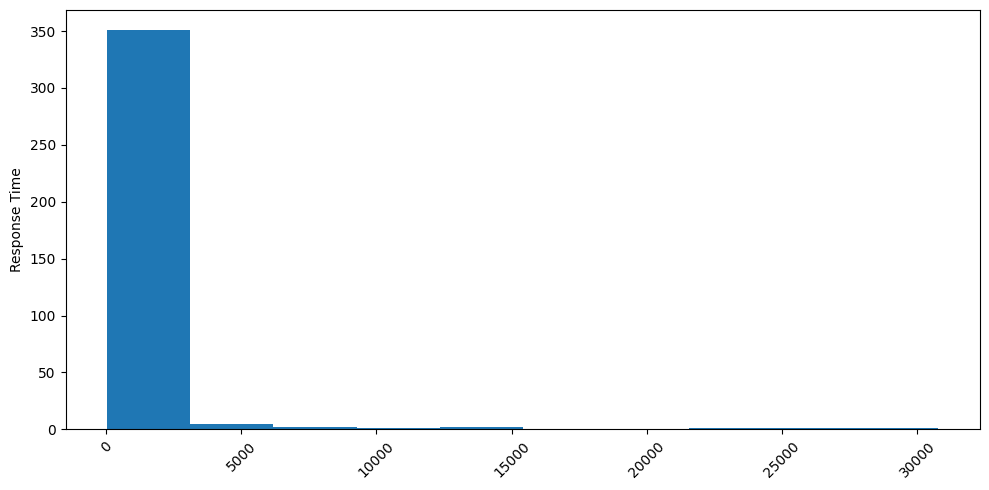

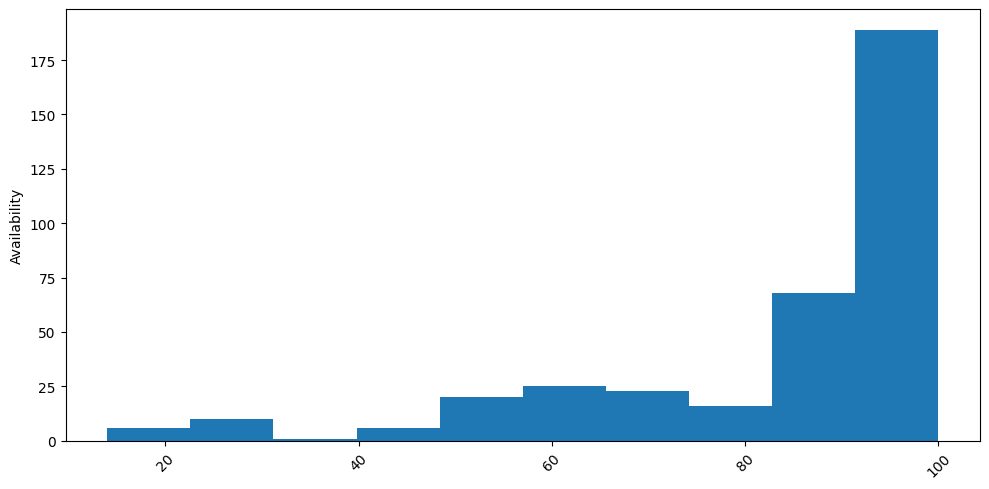

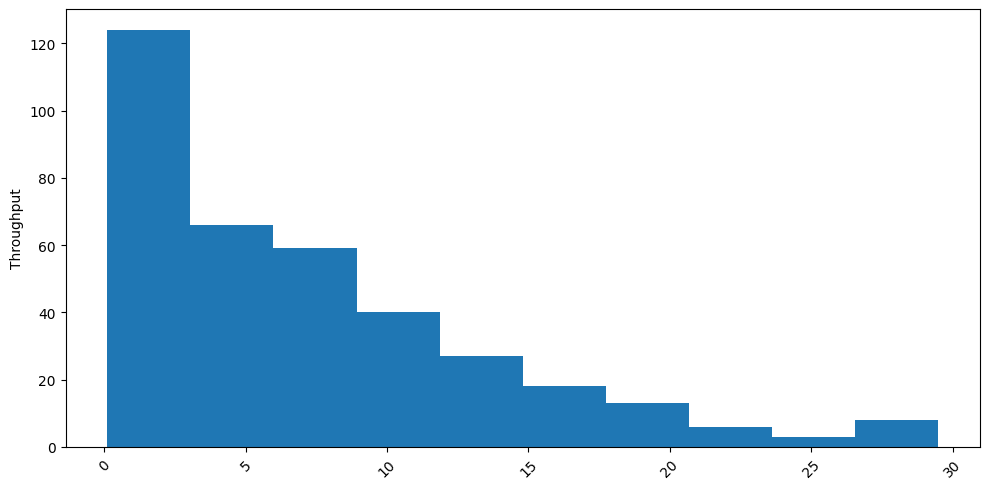

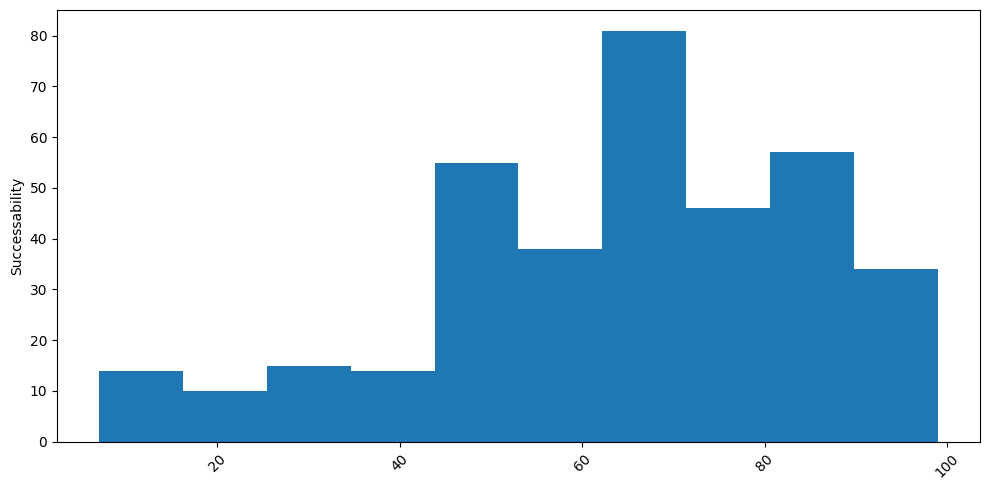

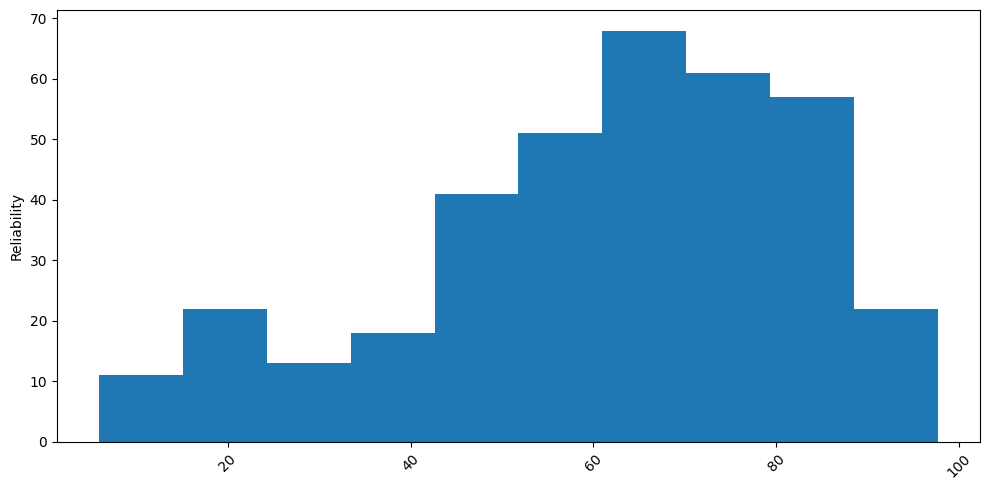

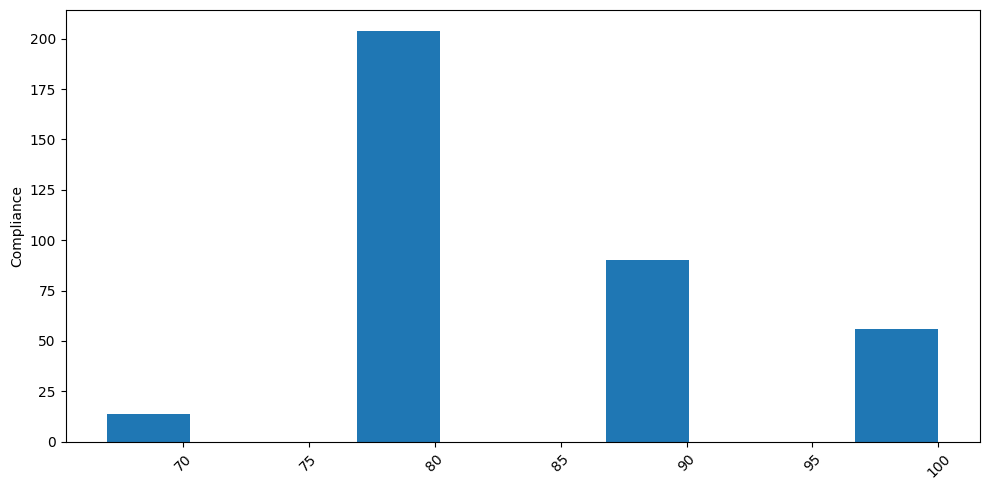

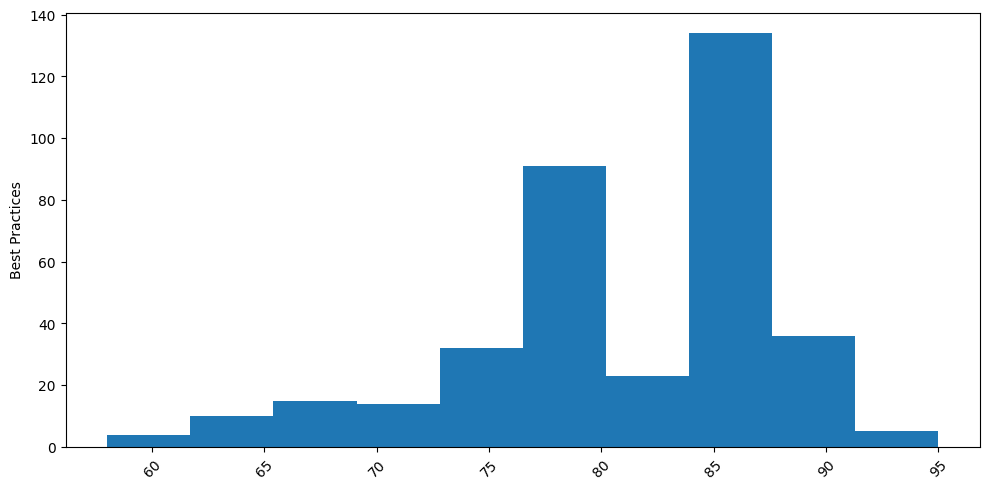

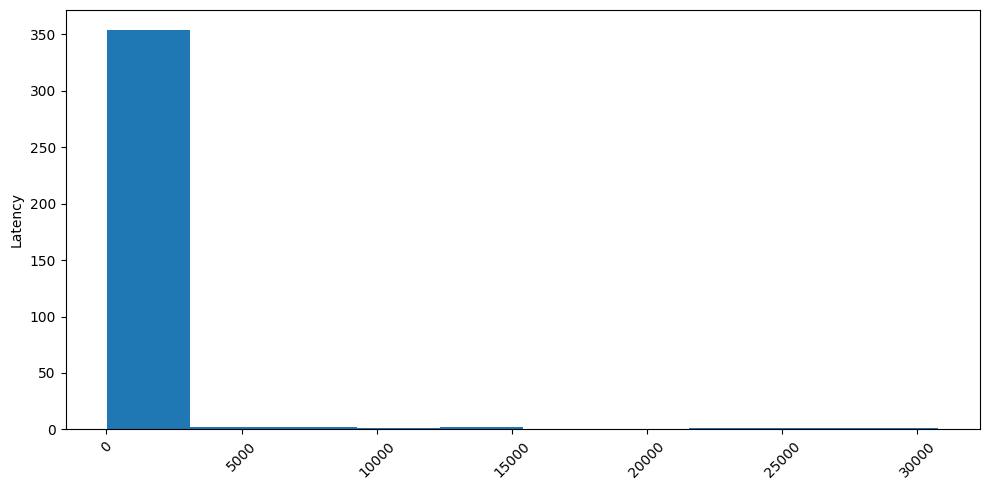

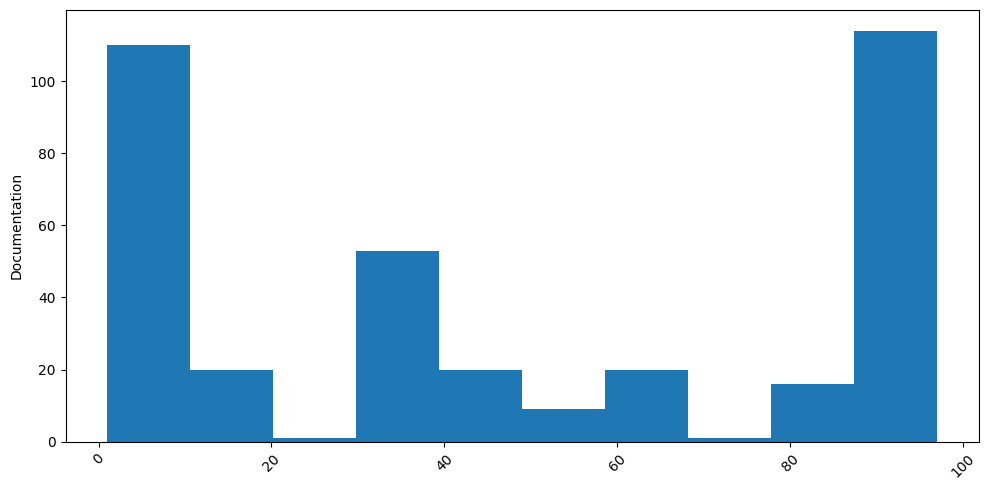

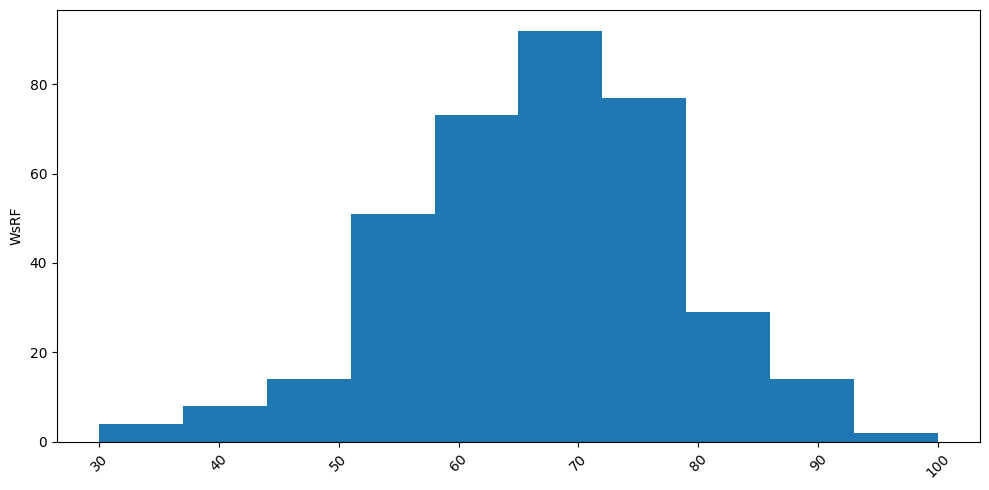

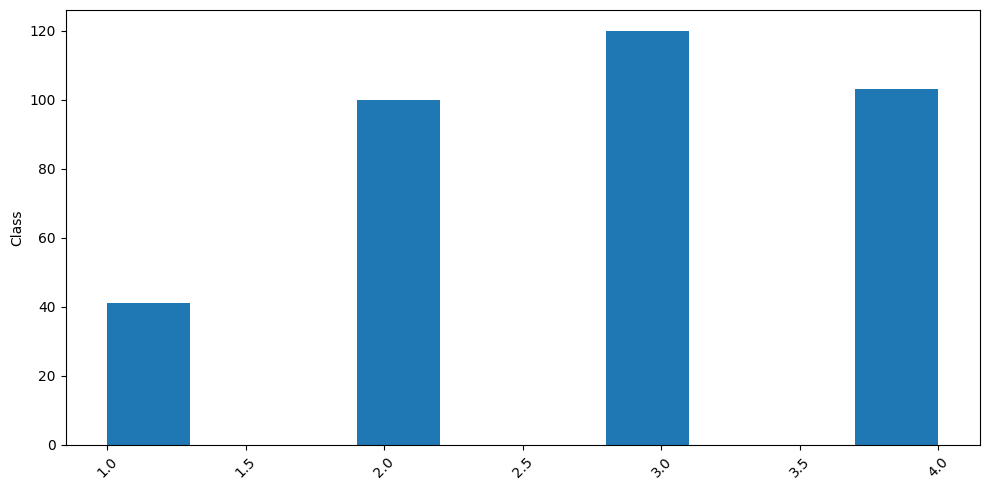

In [6]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

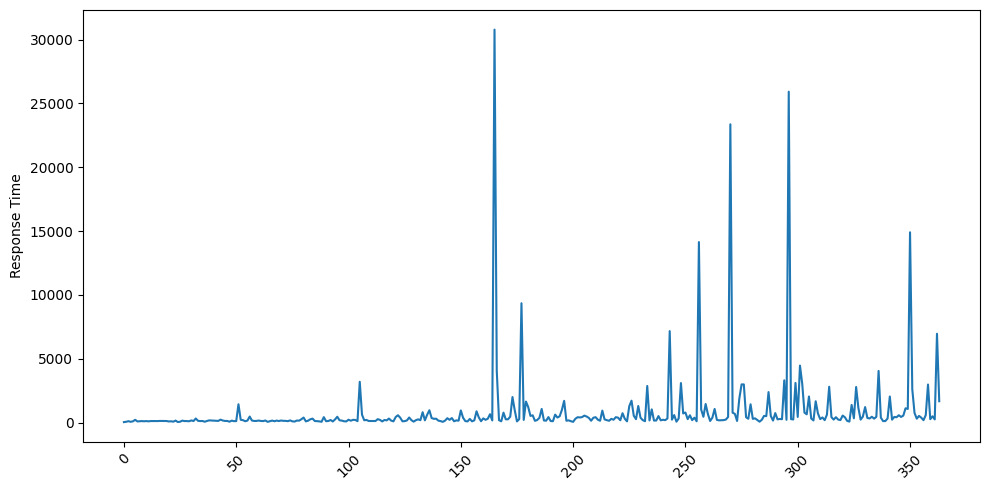

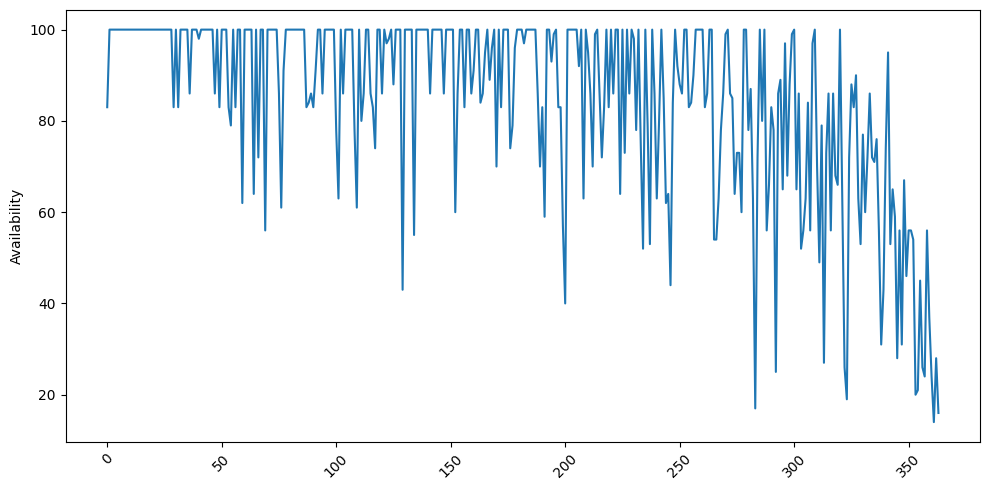

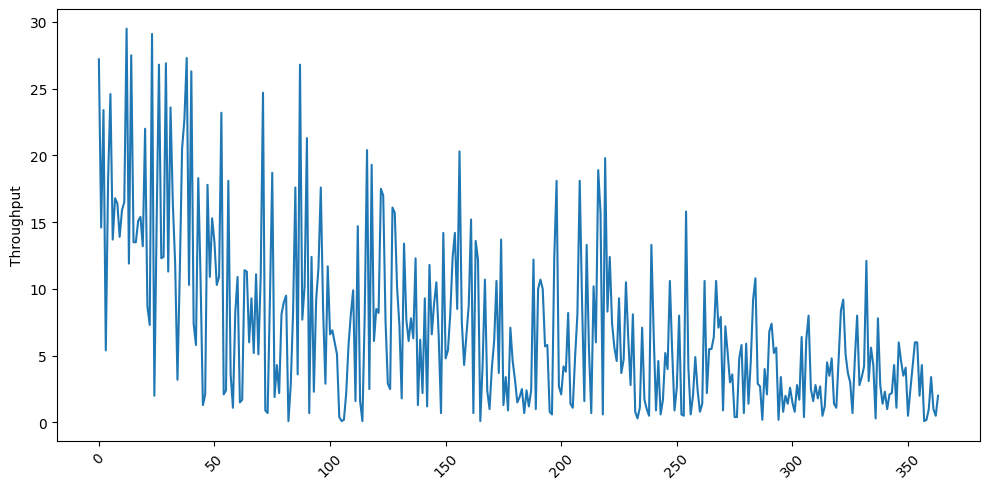

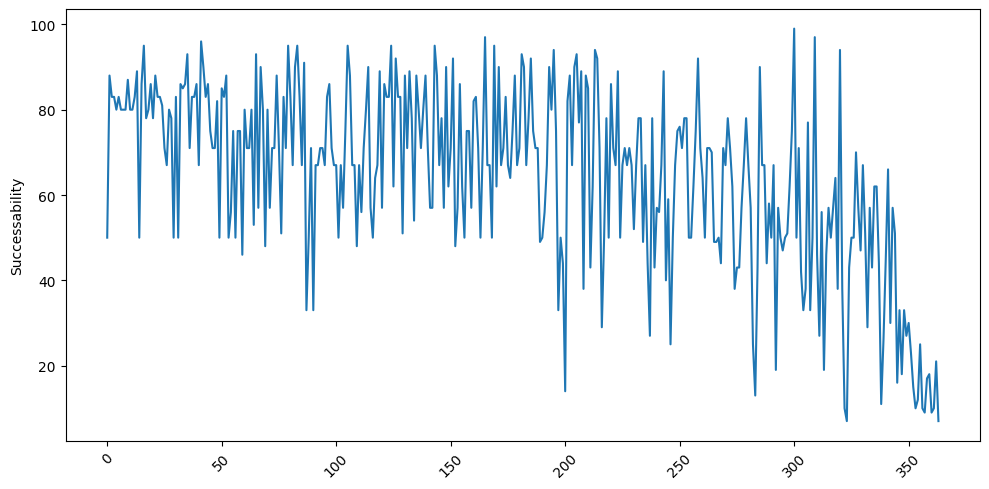

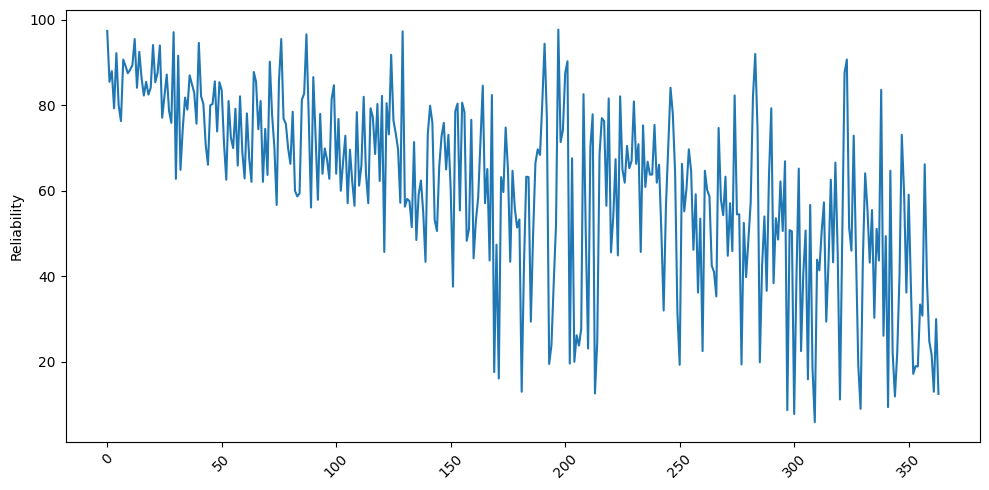

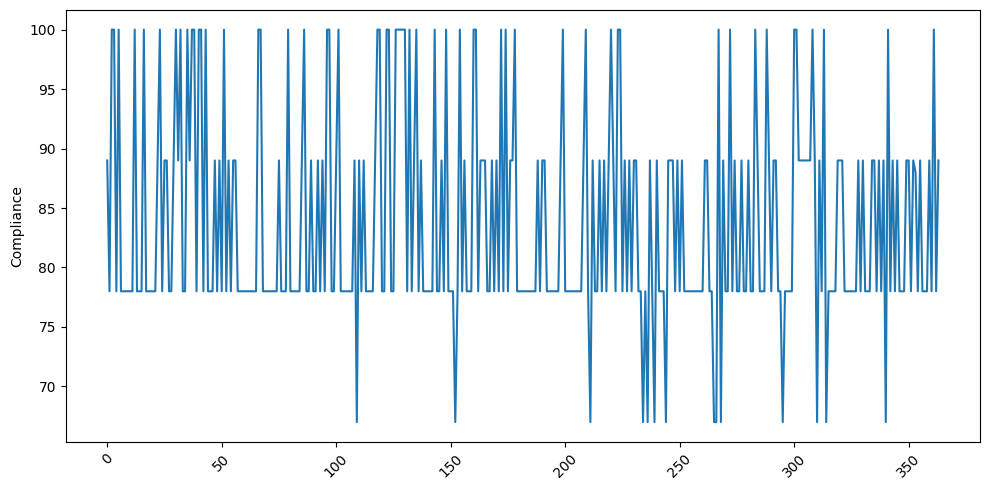

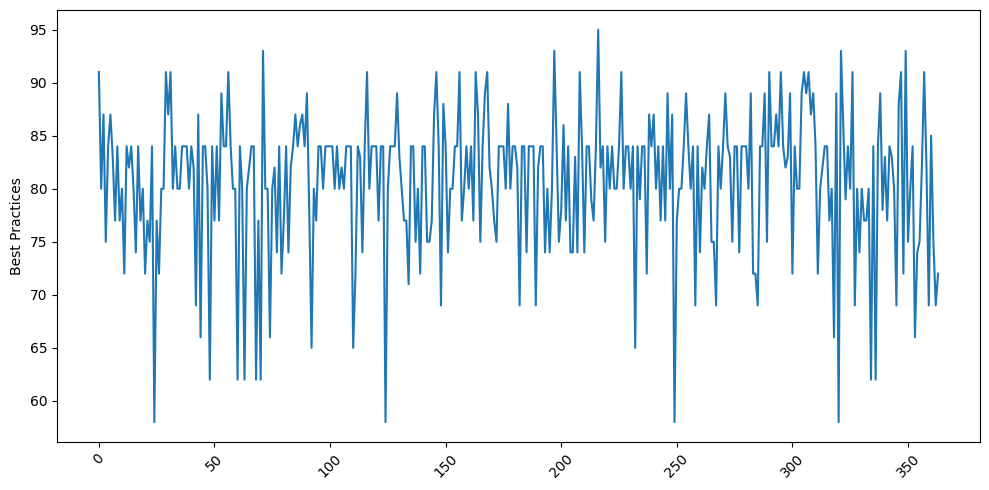

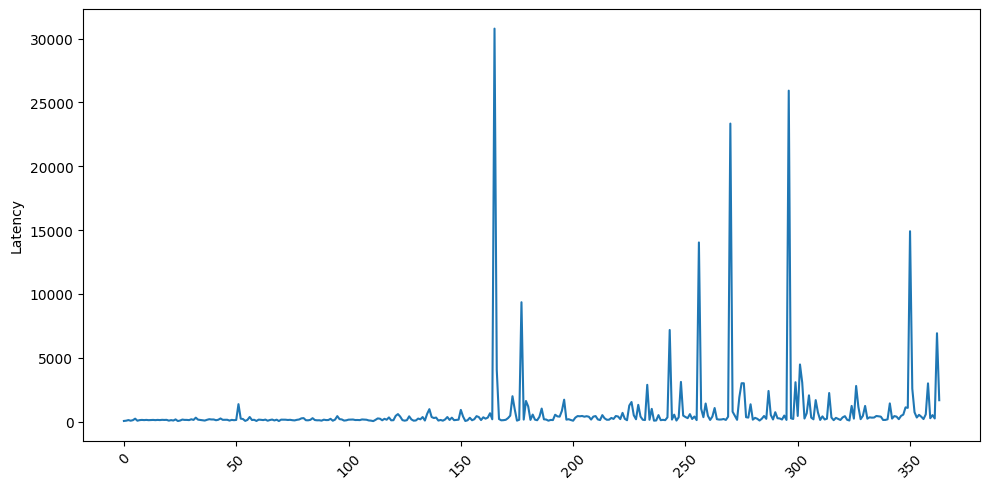

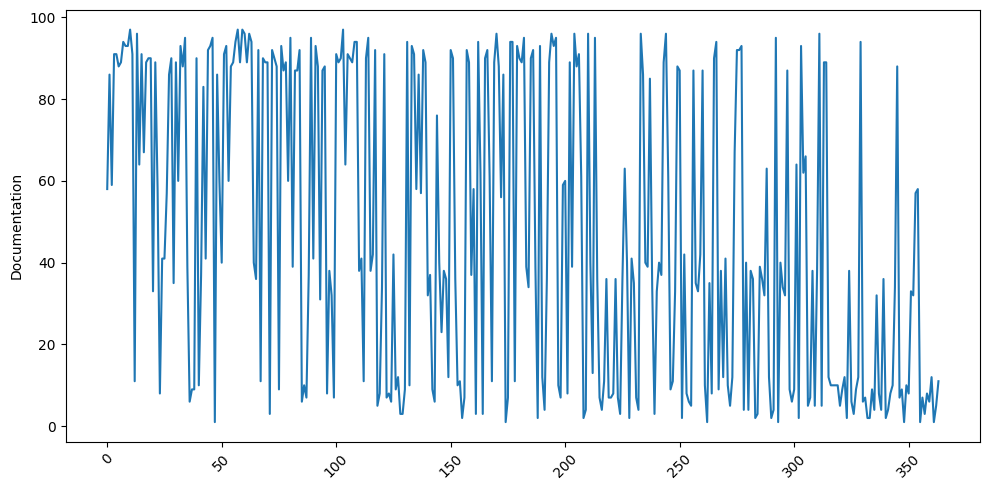

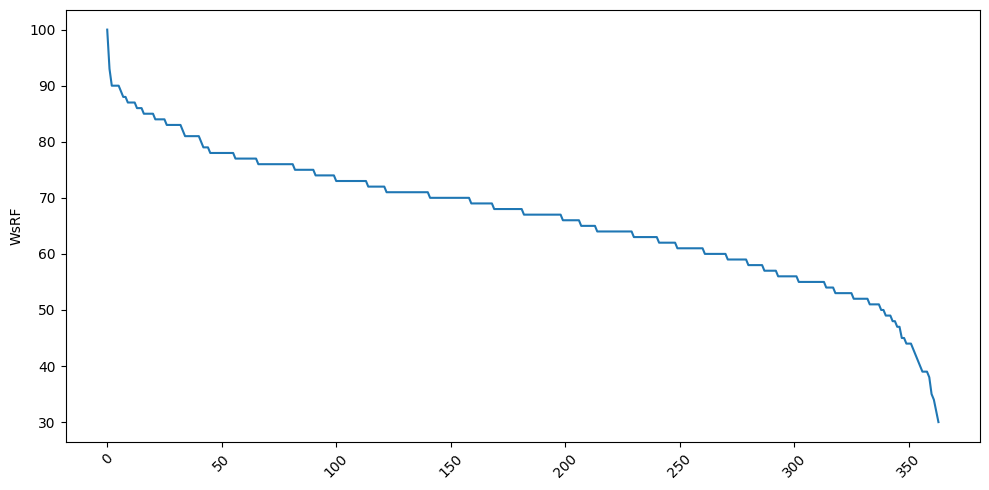

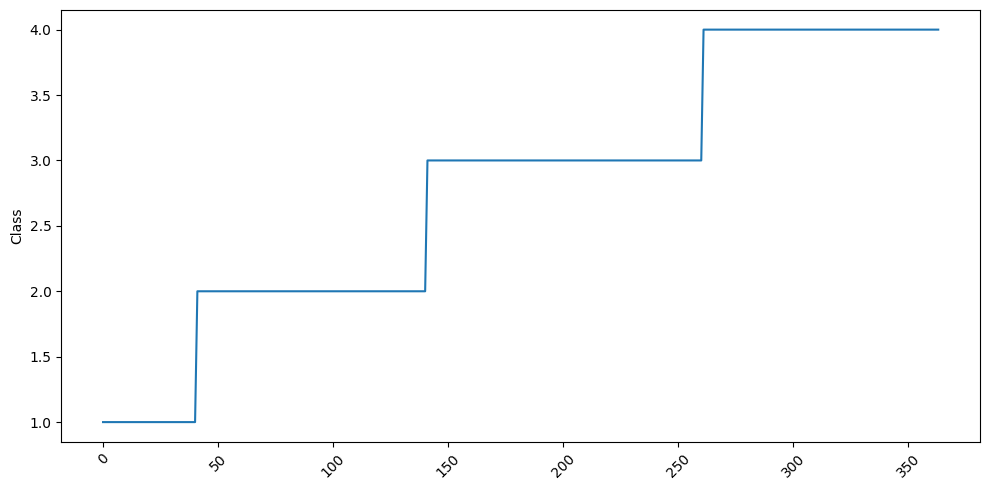

In [7]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Outliers

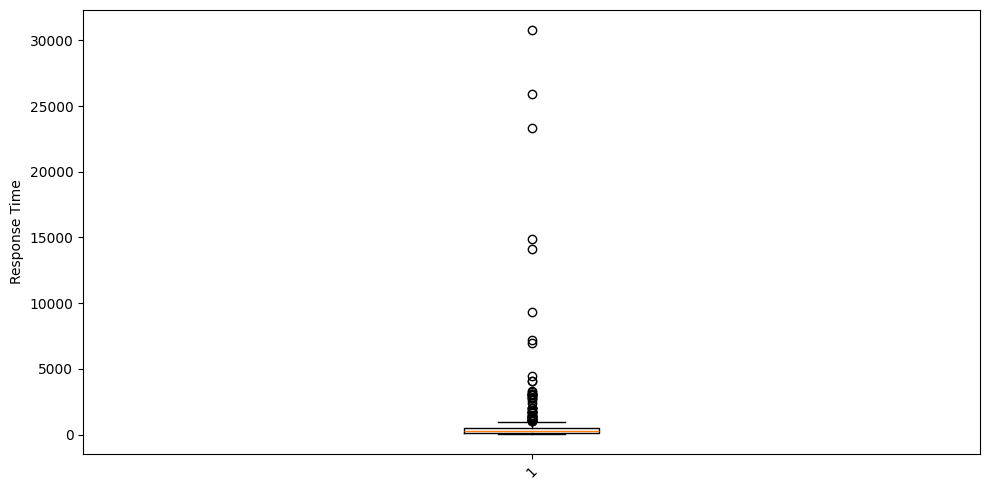

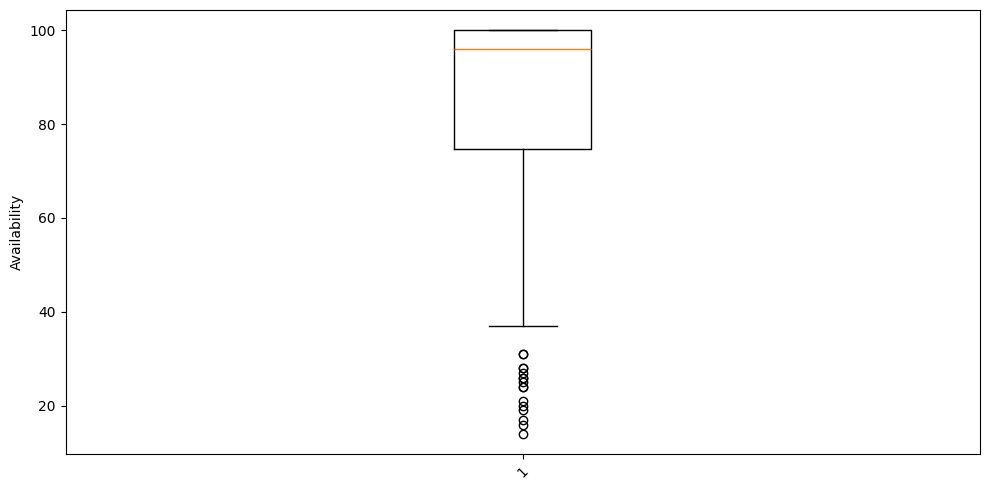

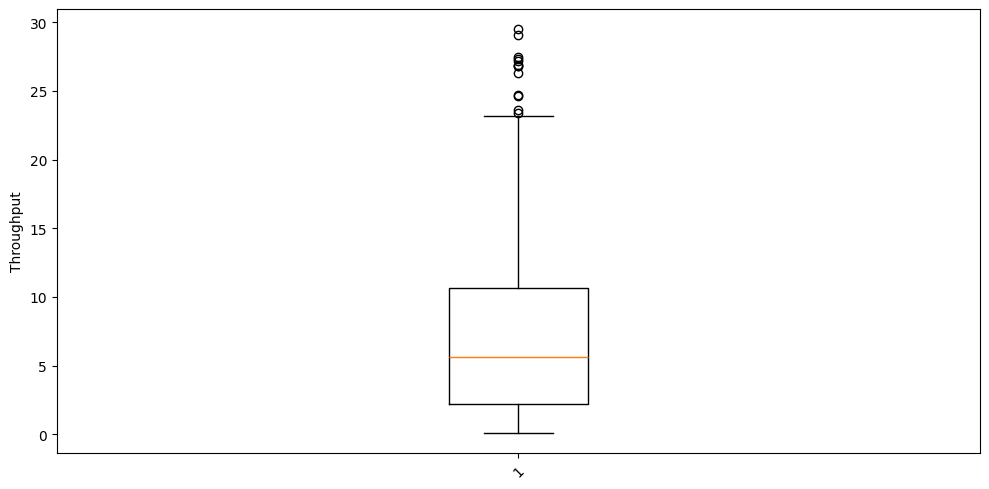

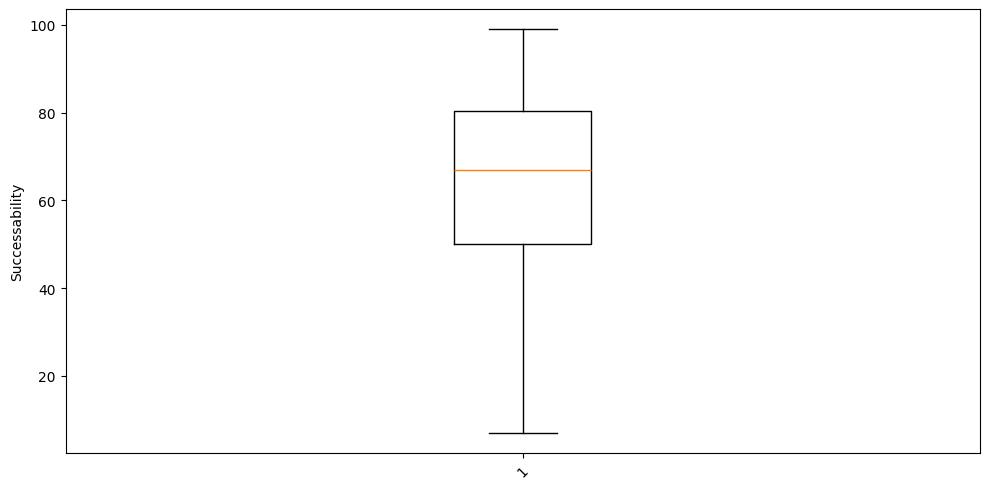

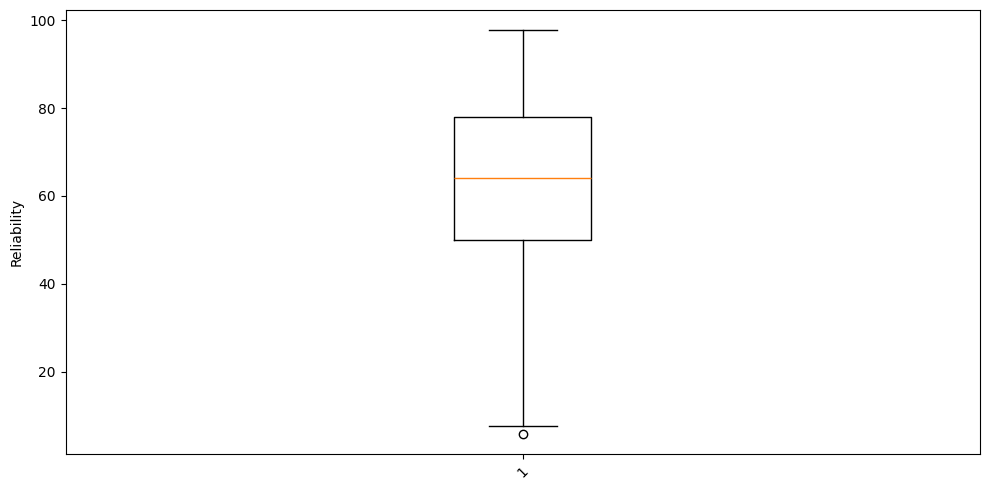

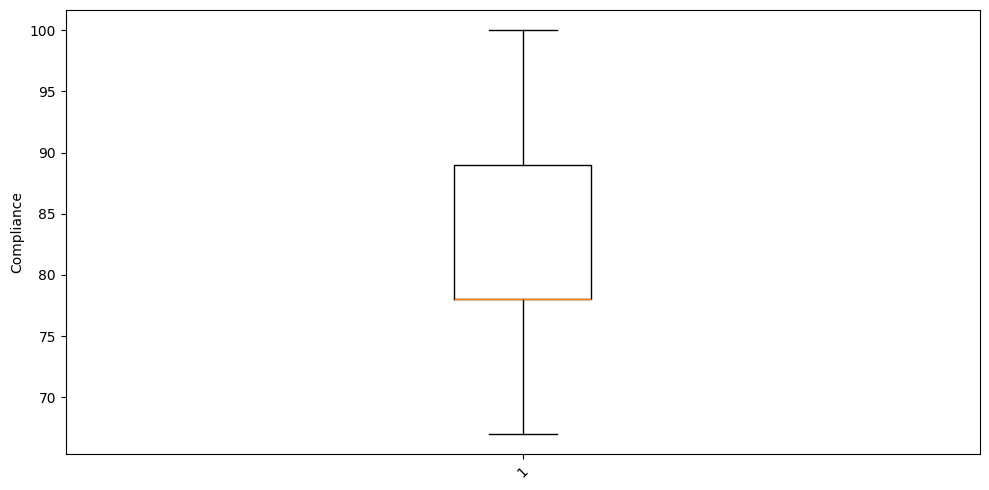

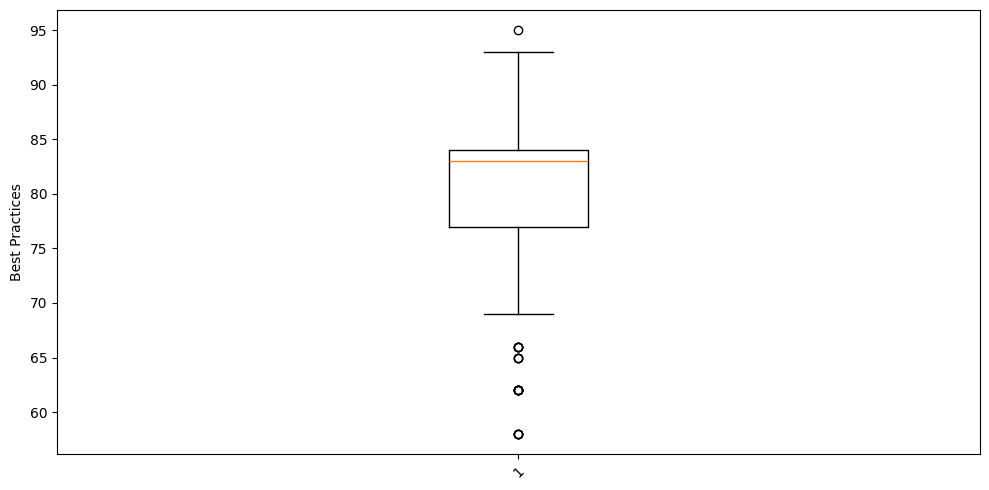

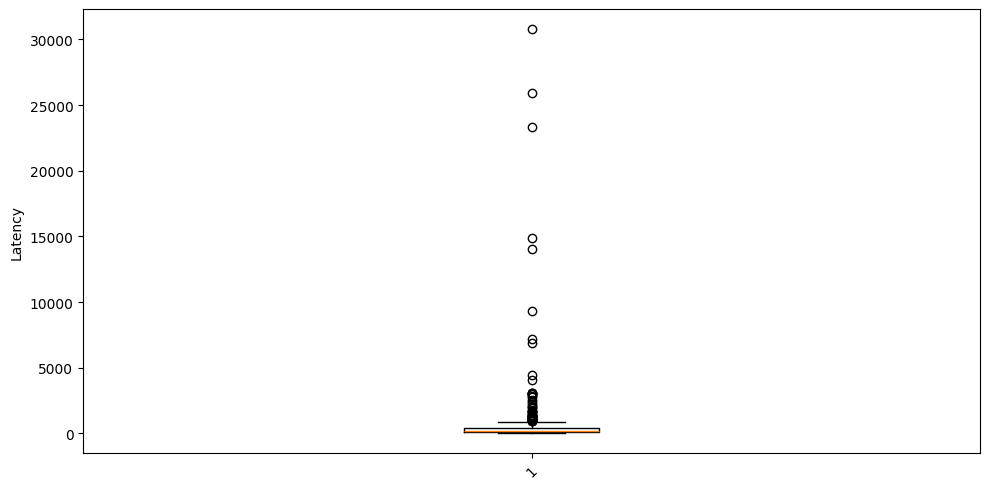

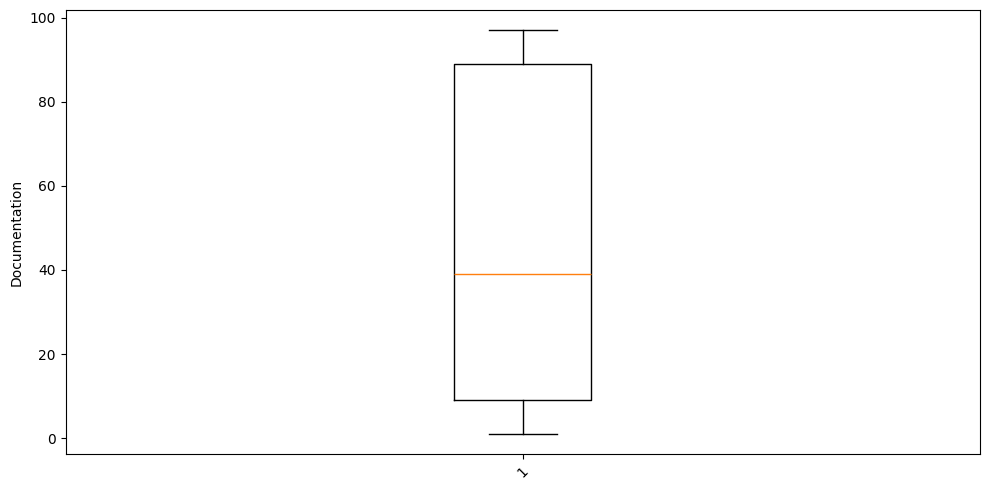

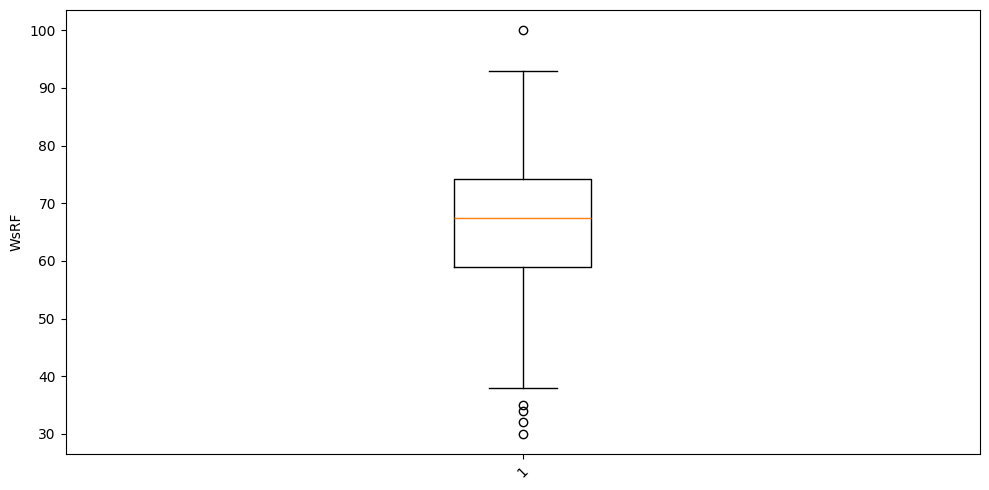

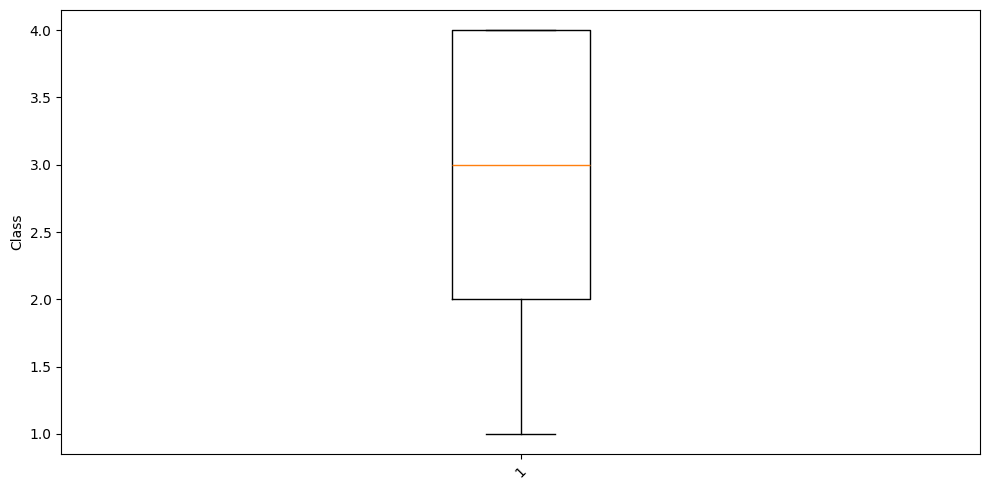

In [8]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [9]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

In [10]:
filtered_df = df.iloc[:0].copy()#df.copy()
threshold = 3

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'Class':
        mean_val = df[col].mean()
        std_val = df[col].std()
        z_scores = (df[col] - mean_val) / std_val
        mask = z_scores.abs() < threshold
        filtered_df[col] = df[col].where(mask)

        median_val = df[col].median()  
        filtered_df[col].fillna(median_val, inplace=True)

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\3930153197.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df[col].fillna(median_val, inplace=True)
C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\3930153197.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


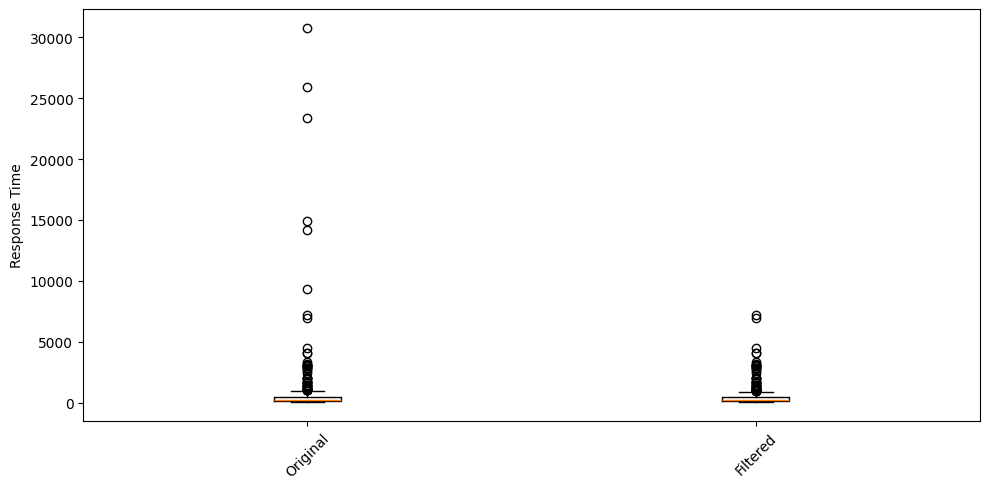

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


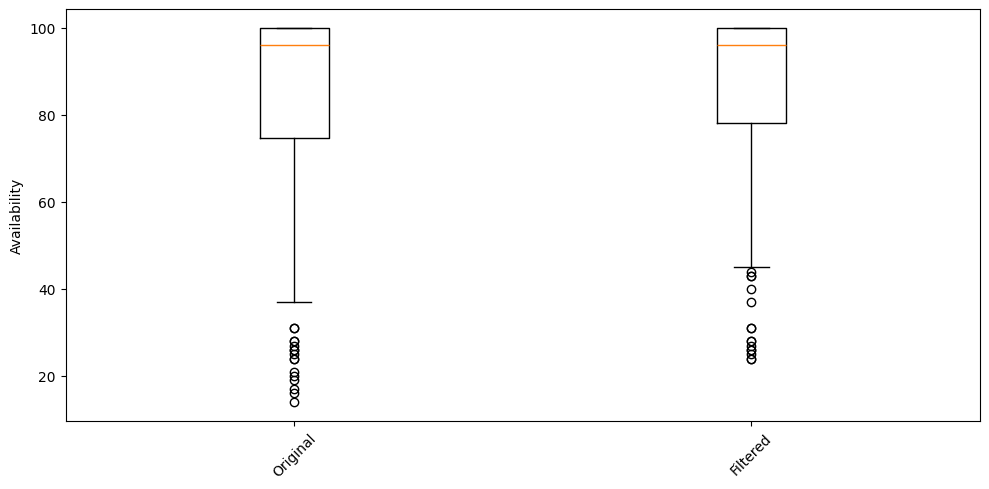

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


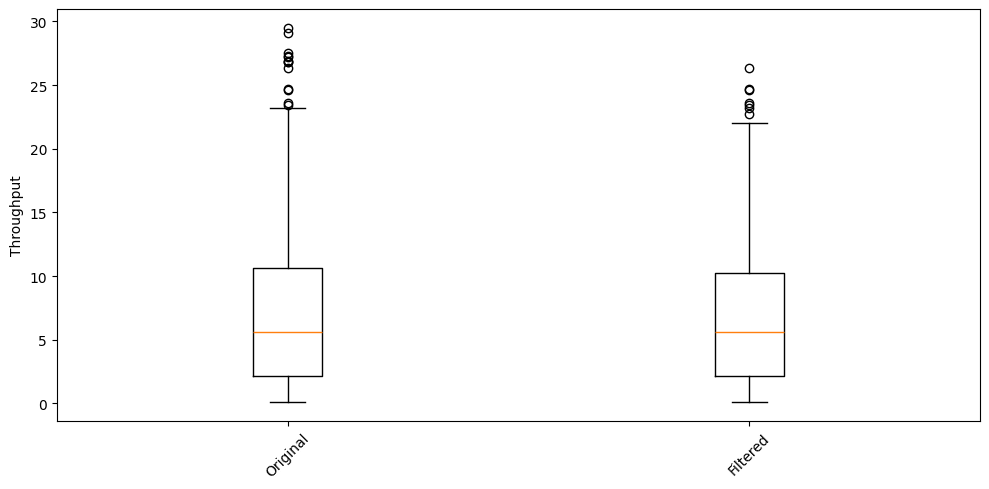

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


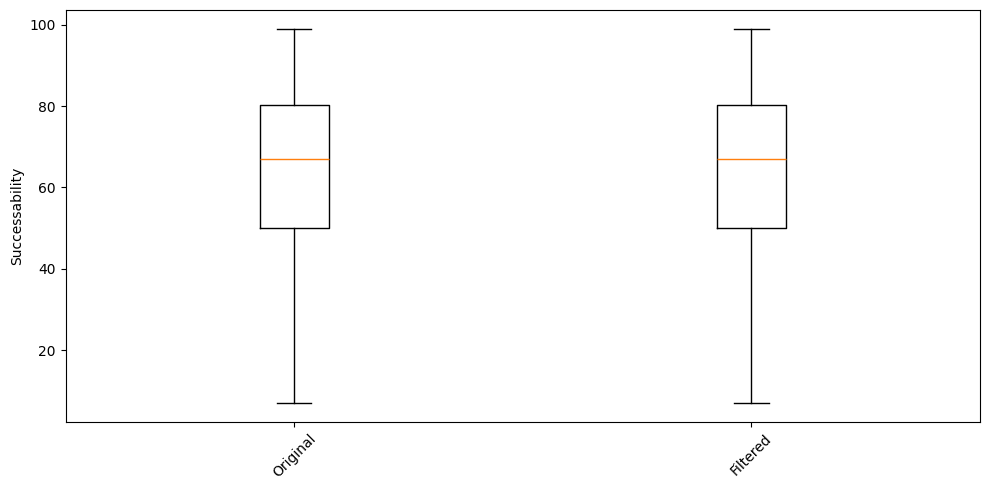

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


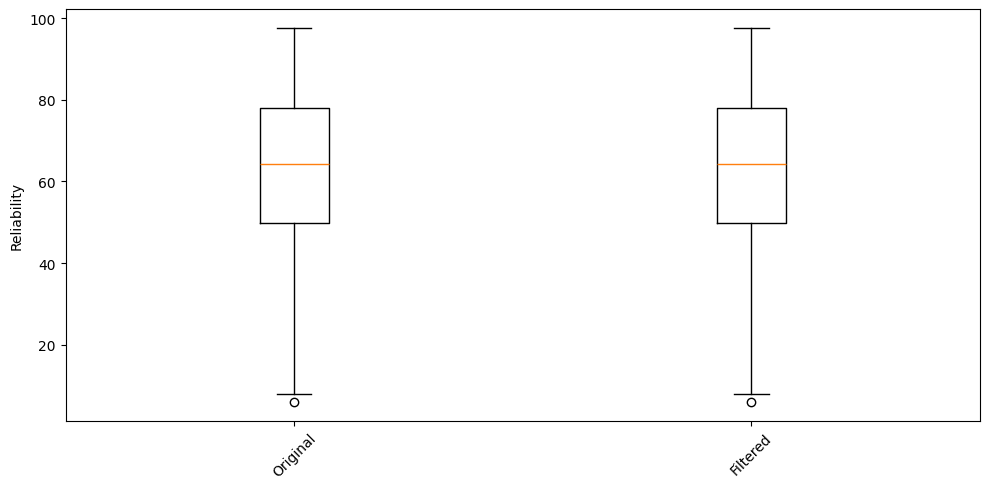

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


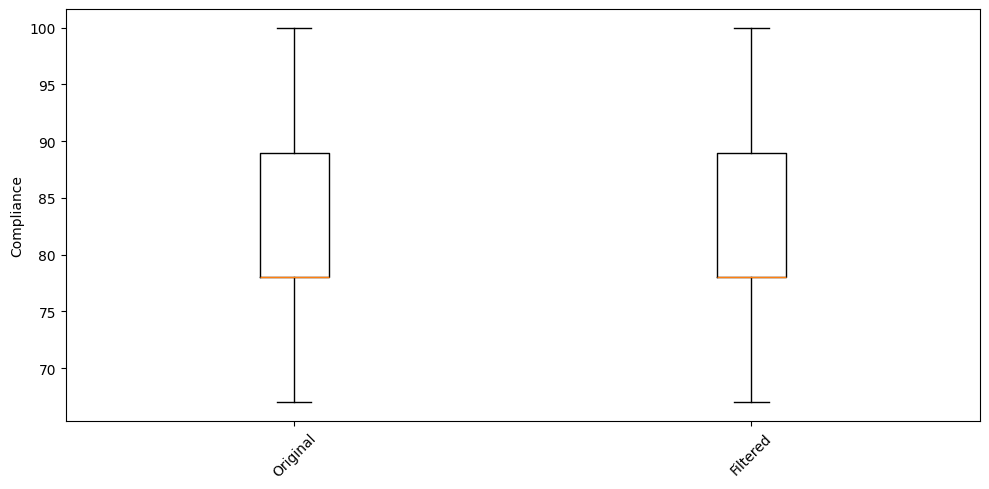

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


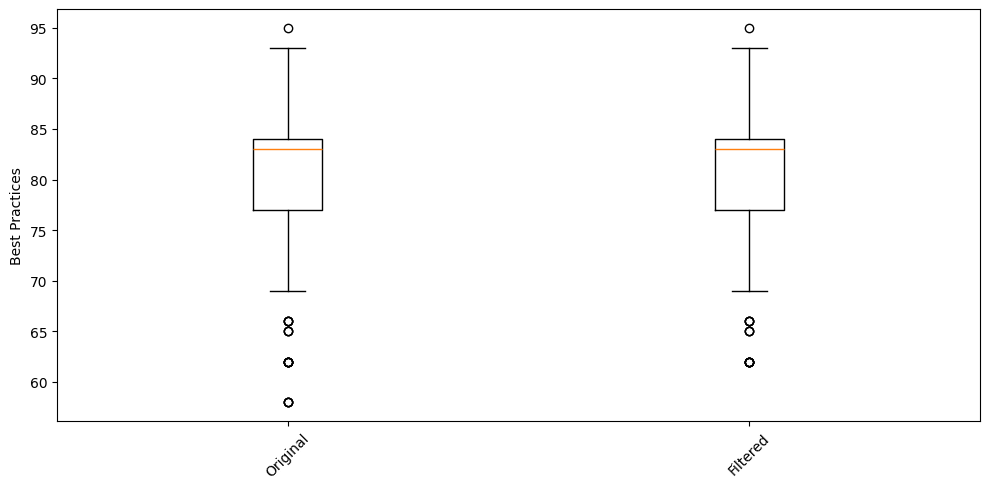

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


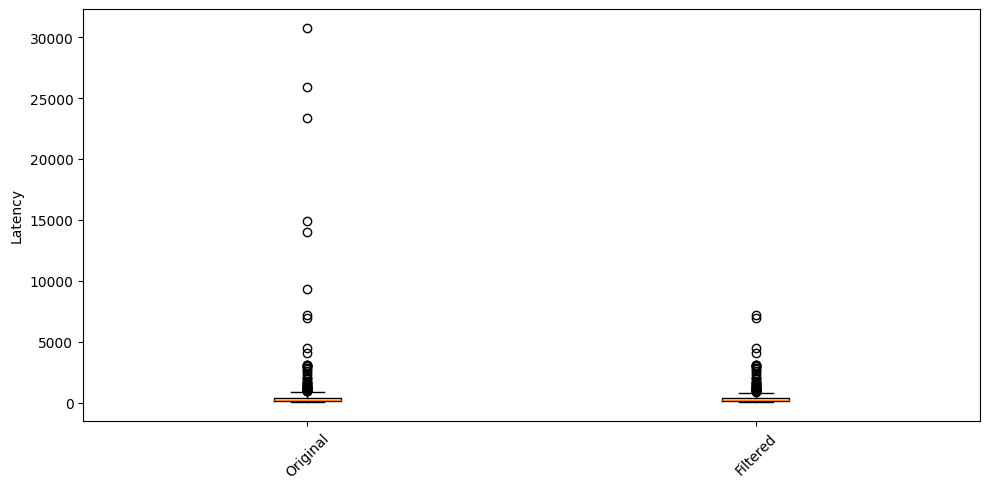

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


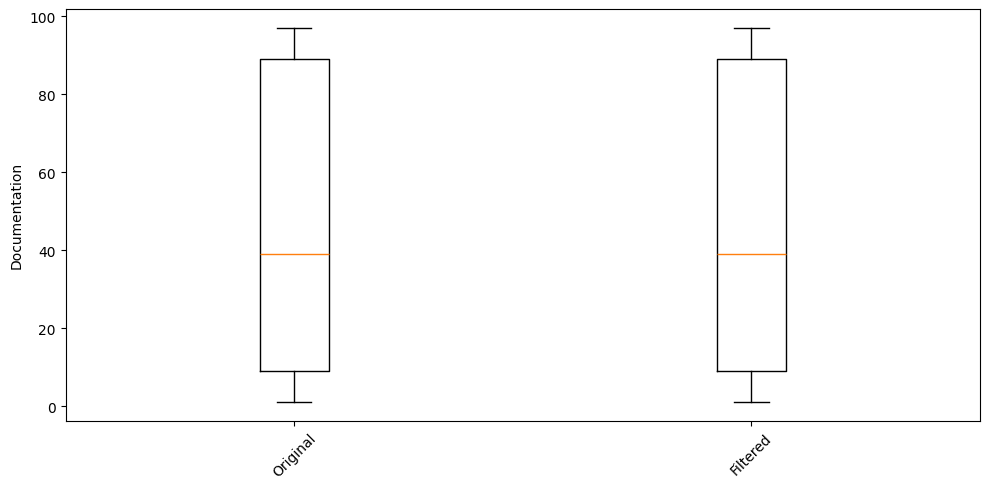

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


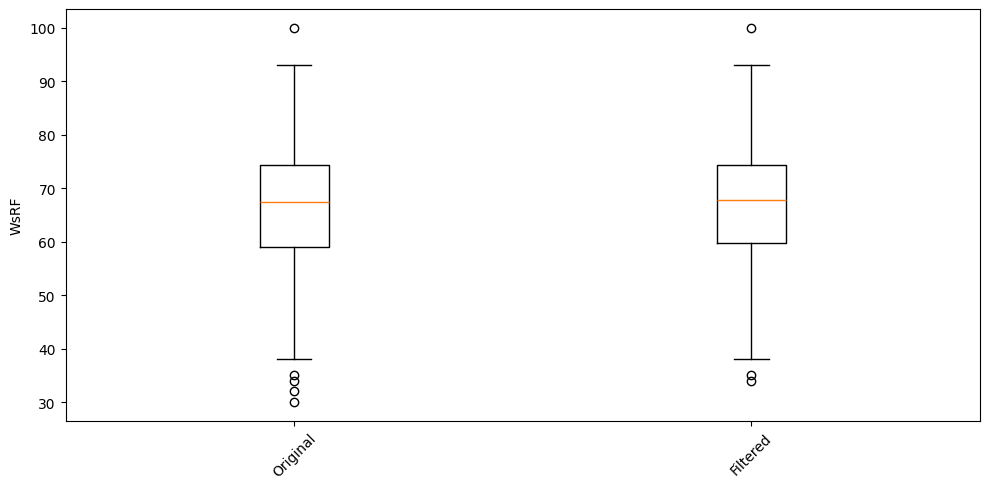

C:\Users\asaraiva\AppData\Local\Temp\ipykernel_21308\861209545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])


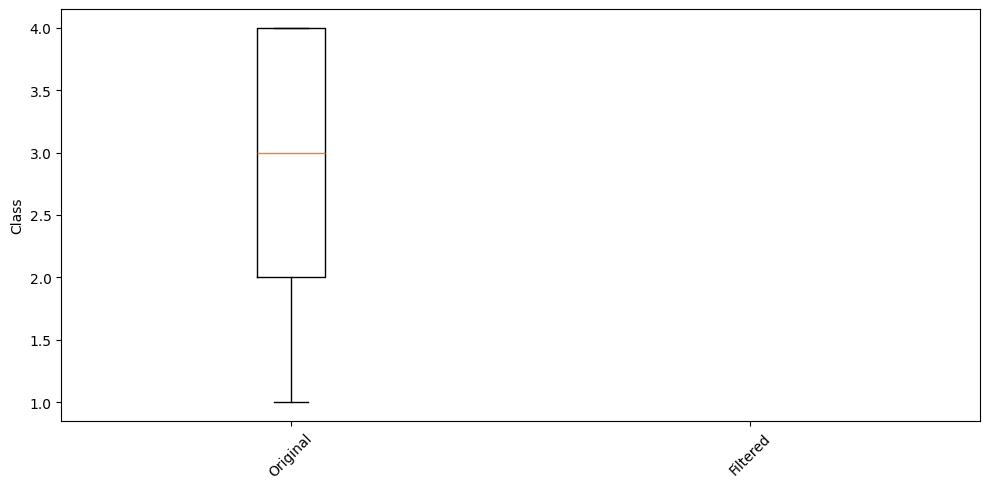

In [11]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot([df[col], filtered_df[col]], labels=['Original', 'Filtered'])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Encoding/Removing str columns

In [12]:
encoded_df = filtered_df.copy() # does not have Service Name or Class

encoded_df['Class'] = df['Class']
encoded_df['Service Name'] = df['Service Name']

encoder = BinaryEncoder(cols=['Service Name'])
encoded_df = encoder.fit_transform(encoded_df)
encoded_df.drop(columns='WSDL Address', inplace=True)
encoded_df

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name_0,Service Name_1,Service Name_2,Service Name_3,Service Name_4,Service Name_5,Service Name_6,Service Name_7,Service Name_8
0,45.00,83.0,5.6,50,97.4,89,91.0,43.00,58,100.0,1,0,0,0,0,0,0,0,0,1
1,71.75,100.0,14.6,88,85.5,78,80.0,64.42,86,93.0,1,0,0,0,0,0,0,0,1,0
2,117.00,100.0,23.4,83,88.0,100,87.0,111.00,59,90.0,1,0,0,0,0,0,0,0,1,1
3,70.00,100.0,5.4,83,79.3,100,75.0,63.00,91,90.0,1,0,0,0,0,0,0,1,0,0
4,105.20,100.0,18.2,80,92.2,78,84.0,104.60,91,90.0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,274.50,37.0,1.0,18,24.8,89,69.0,257.50,6,38.0,4,1,0,1,0,1,0,1,1,1
360,502.00,24.0,3.4,9,21.8,78,85.0,499.28,12,35.0,4,1,0,1,0,1,1,0,0,0
361,256.31,96.0,1.0,10,13.0,100,75.0,237.62,1,34.0,4,1,0,1,0,1,1,0,0,1
362,6962.85,28.0,0.5,21,30.0,78,69.0,6915.08,5,67.5,4,1,0,1,0,1,1,0,1,0


# Correlation Matrix

Higher correlation between: Response Time / Latency; Successability / Availability; Class / WsRF
Low correlation of Service Name_5, 6, 7, 8

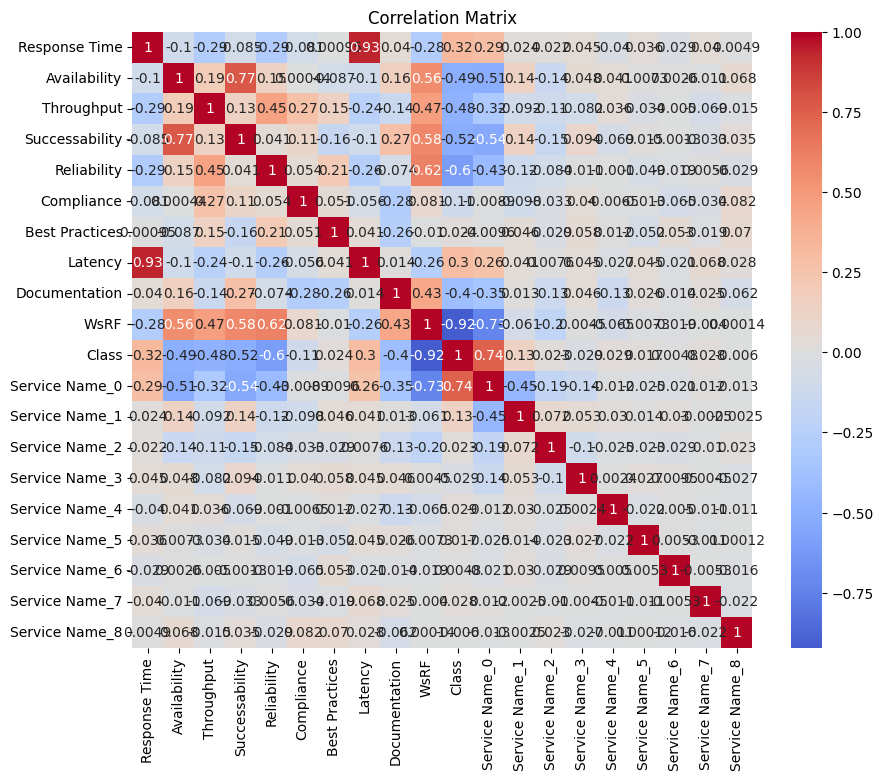

In [13]:
corr_matrix = encoded_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [14]:
ratio_df = encoded_df.drop(columns=['Service Name_4','Service Name_5', 'Service Name_6', 'Service Name_7', 'Service Name_8'])

- Study ration columns

In [15]:
ratio_df['Latency_ResponseTime'] = ratio_df['Response Time'] / ratio_df['Latency']
ratio_df['Availability_Successability'] = ratio_df['Availability'] / ratio_df['Successability']
ratio_df['Class_Wsrf'] = ratio_df['Class'] / ratio_df['WsRF']

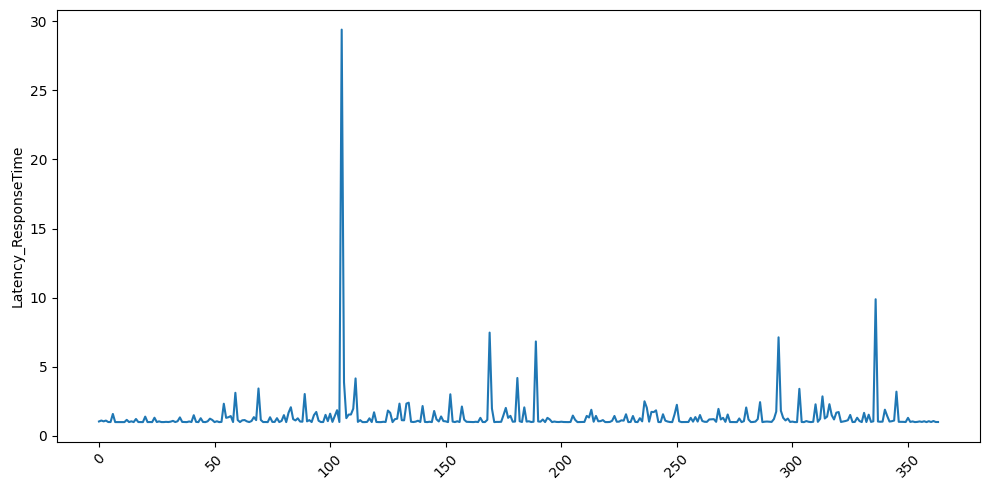

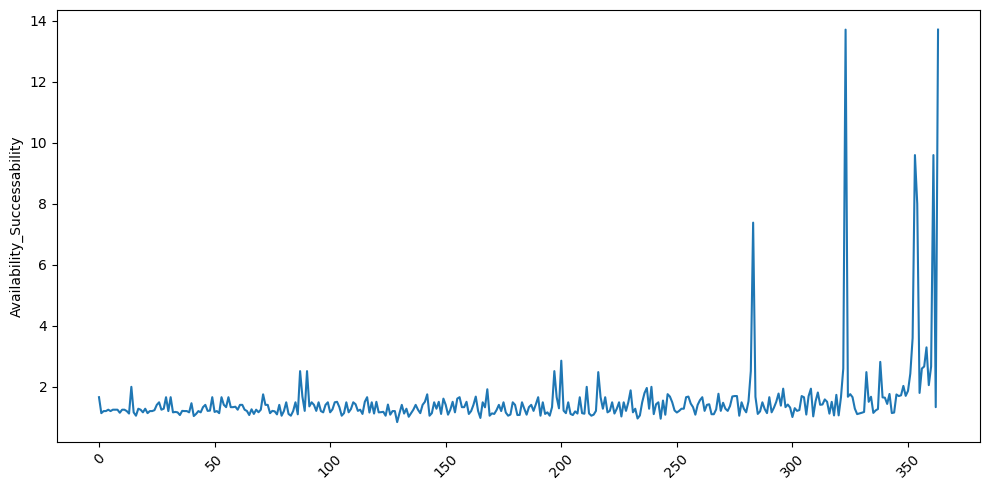

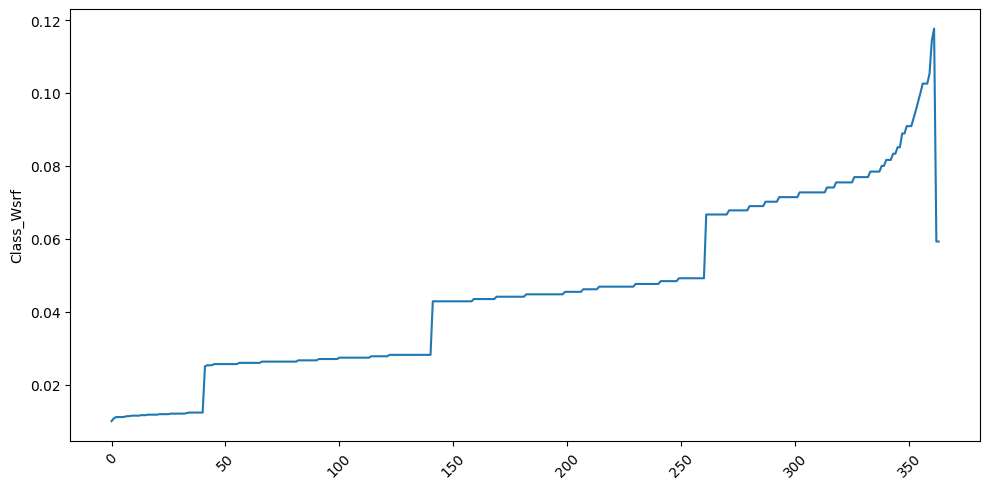

In [16]:
for col in ['Latency_ResponseTime', 'Availability_Successability', 'Class_Wsrf']:

    plt.figure(figsize=(10, 5))
    plt.plot(ratio_df[col])
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

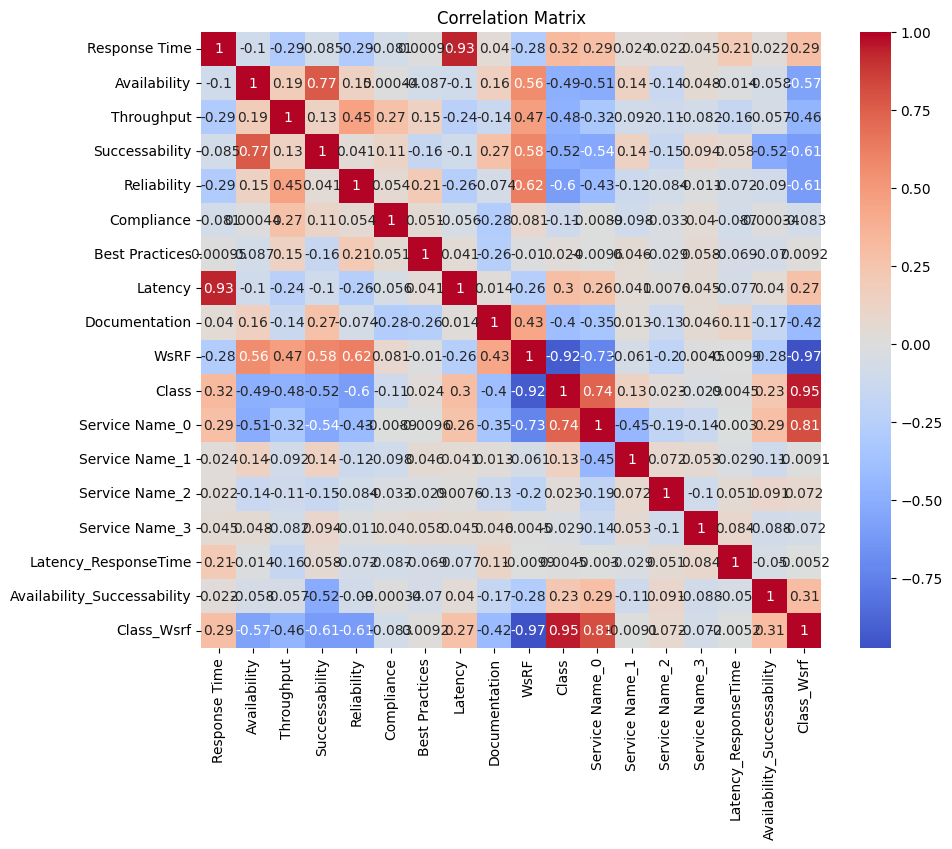

In [17]:
corr_matrix = ratio_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


# Normalize data

In [18]:
scaled_df = encoded_df.drop(columns=['Service Name_4','Service Name_5', 'Service Name_6', 'Service Name_7', 'Service Name_8'])

scaler = StandardScaler()

for col in scaled_df.columns:
    if col != 'Class':
        scaled_df[col] = scaler.fit_transform(scaled_df[[col]])  
        print(scaled_df[col].min(), scaled_df[col].max())

scaled_df

-0.5624852579753881 7.898700425124086
-3.3468507321176766 0.7530154793379941
-1.1790806526158466 3.4312745617616875
-2.716488182547631 1.6346744068795975
-2.6177398955447293 1.7184323648669282
-1.9040519505884055 1.8632799602117798
-3.0377288353376537 2.248262584345949
-0.5187595090968288 8.516061734048781
-1.280040736978323 1.360907690309303
-2.9379155801908885 2.9639561397276584
-0.5942725395818952 1.6827296120792612
-0.7498211517799778 1.3336513615628611
-0.9156330260447347 1.092140597330467
-0.910574394897647 1.098207906573526


,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name_0,Service Name_1,Service Name_2,Service Name_3
0,-0.562485,-0.164060,-0.211258,-0.682793,1.704262,0.607503,1.607536,-0.504205,0.288022,2.963956,1,-0.594273,-0.749821,-0.915633,-0.910574
1,-0.530722,0.753015,1.372452,1.114427,1.142165,-0.648275,-0.154461,-0.477097,1.058299,2.338000,1,-0.594273,-0.749821,-0.915633,-0.910574
2,-0.476992,0.753015,2.920968,0.877950,1.260253,1.863280,0.966810,-0.418147,0.315532,2.069733,1,-0.594273,-0.749821,-0.915633,-0.910574
3,-0.532800,0.753015,-0.246452,0.877950,0.849309,1.863280,-0.955369,-0.478894,1.195848,2.069733,1,-0.594273,-0.749821,-0.915633,-0.910574
4,-0.491004,0.753015,2.005936,0.736065,1.458640,-0.648275,0.486265,-0.426246,1.195848,2.069733,1,-0.594273,-0.749821,-0.915633,-0.910574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,-0.289976,-2.645558,-1.020710,-2.196240,-1.724999,0.607503,-1.916458,-0.232741,-1.142491,-2.580226,4,1.682730,-0.749821,1.092141,-0.910574
360,-0.019842,-3.346851,-0.598387,-2.621898,-1.866704,-0.648275,0.646447,0.073249,-0.977432,-2.848493,4,1.682730,-0.749821,1.092141,-0.910574
361,-0.311575,0.537233,-1.020710,-2.574602,-2.282371,1.863280,-0.955369,-0.257900,-1.280041,-2.937916,4,1.682730,-0.749821,1.092141,-0.910574
362,7.651792,-3.131068,-1.108694,-2.054355,-1.479377,-0.648275,-1.916458,8.192898,-1.170001,0.057731,4,1.682730,-0.749821,1.092141,-0.910574


- Dimentionality Reduction

In [19]:
X = scaled_df.drop(columns=['Class'])
Y = scaled_df['Class']

c:\Users\asaraiva\OneDrive - Capgemini\Documents\ROUTE25\ROUTE25\11_1\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


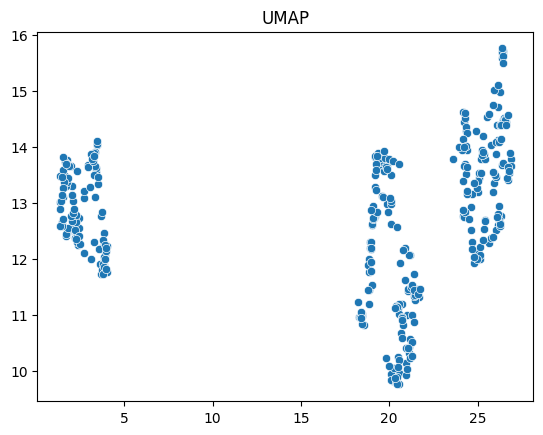

In [20]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1])
plt.title("UMAP")
plt.show()

# Save

In [22]:
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['label'] = Y

scaled_df.to_csv('data/processed_data.csv',index=False) # without dimentionality reduction
df_umap.to_csv('data/data_umap.csv', index=False)

# References

Dimentionality reduction: 


https://medium.com/@adnan.mazraeh1993/a-comprehensive-guide-to-dimensionality-reduction-from-basic-to-super-advanced-techniques-19-c63858266cbd
https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb